### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [9]:
data.isnull().sum()[data.isnull().sum() > 0]

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

We can observe that there are 5 columns that contain missing data: [`car`, `Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantLessThan20`, `Restaurant20To50`]. For four of them the data missing is pretty low compare to the 12684 rows, even if the missing data is spreaded in different rows and we were dropping each of them we would only lose 6.26% of our data. For the fifth row: the car one, the column has approximatively 99% of the data missing so it could be interesting to see if this column is valuable or not to maybe drop it.

In the next cells I will check all the values inside each column to check if we have any corrupted data inside the different columns.

In [12]:
data['destination'].value_counts()

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

In [13]:
data['passanger'].value_counts()

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

In [14]:
data['weather'].value_counts()

weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

In [15]:
data['temperature'].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

In [16]:
data['time'].value_counts()

time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

In [17]:
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [18]:
data['expiration'].value_counts()

expiration
1d    7091
2h    5593
Name: count, dtype: int64

In [19]:
data['gender'].value_counts()

gender
Female    6511
Male      6173
Name: count, dtype: int64

In [20]:
data['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [21]:
data['maritalStatus'].value_counts()

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64

In [22]:
data['has_children'].value_counts()

has_children
0    7431
1    5253
Name: count, dtype: int64

In [23]:
data['education'].value_counts()

education
Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: count, dtype: int64

In [24]:
data['occupation'].value_counts()

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

In [25]:
data['income'].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [26]:
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

We can see that some data seem a bit problematic but considering that this column could be dropped, we will see if we need to correct it or not.

In [28]:
data['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [29]:
data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [30]:
data['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [31]:
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [32]:
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [33]:
data['toCoupon_GEQ5min'].value_counts()

toCoupon_GEQ5min
1    12684
Name: count, dtype: int64

In [34]:
data['toCoupon_GEQ15min'].value_counts()

toCoupon_GEQ15min
1    7122
0    5562
Name: count, dtype: int64

In [35]:
data['toCoupon_GEQ25min'].value_counts()

toCoupon_GEQ25min
0    11173
1     1511
Name: count, dtype: int64

In [36]:
data['direction_same'].value_counts()

direction_same
0    9960
1    2724
Name: count, dtype: int64

In [37]:
data['direction_opp'].value_counts()

direction_opp
1    9960
0    2724
Name: count, dtype: int64

In [38]:
data['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

After analyzing all the columns of the dataframe, we realize that nearly all the data is already cleaned up, only the `car` column seems problematic and there are also few rows that contains missing data but not enough to to impact the data in general.

3. Decide what to do about your missing data -- drop, replace, other...

In [41]:
data = data.drop(columns=['car'])
data = data.dropna()

I decided to first drop the `car` column because it had a lot of missing data so it was not going to be valuable for our analysis, then because most of the unknown data was removed, I have decided to drop the remaining rows that contains unknown data to be sure to work only with good data and we can see that we went from 12684 entries to 12079, it means we have lost only 4.8% of the data, so we will do our analysis on 95.2% of the data which seems a very good number and we should avoid wrong analysis.

4. What proportion of the total observations chose to accept the coupon?



In [44]:
len(data[data['Y'] == 1]) / len(data)

0.5693352098683666

With the ratio of people accepting the coupon divided by the number of people, we realize that approximatively `57%` of the people have accepted the coupon.

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Representation of the different types of coupons delivered ranked by the number of coupons delivered')

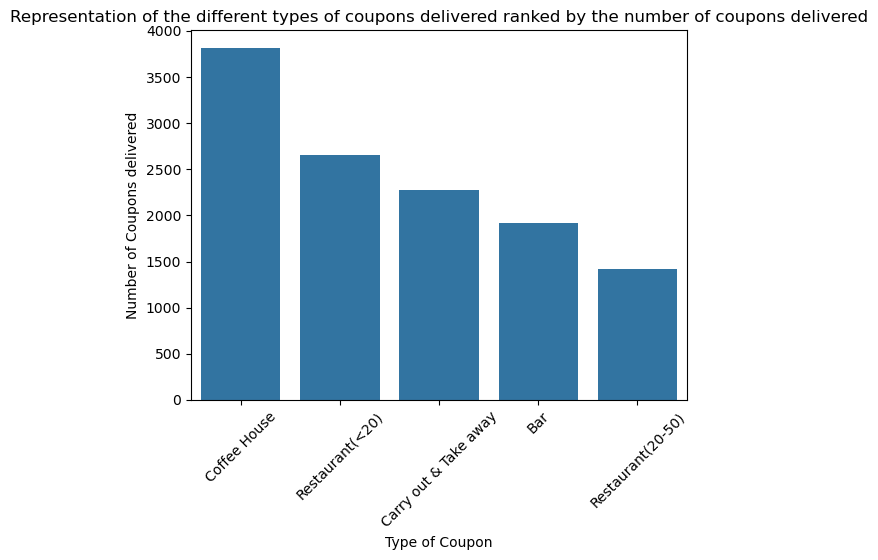

In [47]:
couponBarPlot = sns.countplot(data=data, x='coupon', order=data['coupon'].value_counts().index)
couponBarPlot.tick_params(axis='x', labelrotation = 45)
couponBarPlot.set_xlabel('Type of Coupon')
couponBarPlot.set_ylabel('Number of Coupons delivered')
couponBarPlot.set_title('Representation of the different types of coupons delivered ranked by the number of coupons delivered')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Representation of the temperature at the time the coupons got delivered')

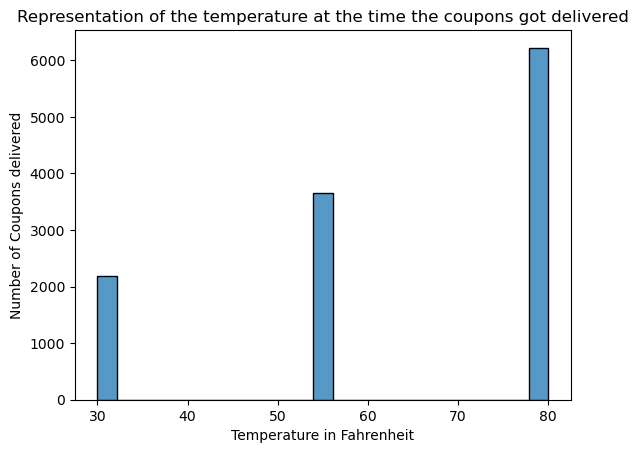

In [49]:
temperatureHistogram = sns.histplot(data=data, x='temperature')
temperatureHistogram.set_xlabel('Temperature in Fahrenheit')
temperatureHistogram.set_ylabel('Number of Coupons delivered')
temperatureHistogram.set_title('Representation of the temperature at the time the coupons got delivered')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [51]:
barCouponDf=data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [53]:
len(barCouponDf[barCouponDf['Y'] == 1]) / len(barCouponDf)

0.41191845269210664

With the ratio of people accepting the bar coupon divided by the number of people that received a bar coupon, we realize that approximatively `41%` of the people have accepted the coupon.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [56]:
barCouponDfLessthan3 = barCouponDf.query('not Bar in ["4~8", "gt8"]')
barCouponDfMorethan4 = barCouponDf.query('Bar in ["4~8", "gt8"]')
print("Ratio for people who went to a bar 3 or fewer times a month: "
      + str(len(barCouponDfLessthan3[barCouponDfLessthan3['Y'] == 1]) / len(barCouponDfLessthan3)))
print("Ratio for people who went to a bar 4 or more times a month: "
      + str(len(barCouponDfMorethan4[barCouponDfMorethan4['Y'] == 1]) / len(barCouponDfMorethan4)))

Ratio for people who went to a bar 3 or fewer times a month: 0.37267441860465117
Ratio for people who went to a bar 4 or more times a month: 0.7616580310880829


The results shows us that the number of people that goes to the bar more than 4 times a month uses their coupons for `76%` of them when people going less than 3 times a month are using it at `37%` which shows us that targeting people that goes to the bar more than 4 times a month with Bar coupons is a very good choice because there is a market but another interesting part it's that if we remember above, the global ratio was `41%` which means that even if the people going 4 times a month or more are a very responsive market, it is also a very small market compare to the number of people going less than 3 times a month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [59]:
barCouponDfMore1Over25 = barCouponDf.query('not Bar in ["never", "less1"] and not age in [21, "below21"]')
barCouponDfOtherThanMore1Over25 = barCouponDf.query('Bar in ["never", "less1"] or age in [21, "below21"]')
print("Ratio for people who are over the age of 25 and went to a bar 1 or more times a month: "
      + str(len(barCouponDfMore1Over25[barCouponDfMore1Over25['Y'] == 1]) / len(barCouponDfMore1Over25)))
print("Ratio for the other people: "
      + str(len(barCouponDfOtherThanMore1Over25[barCouponDfOtherThanMore1Over25['Y'] == 1]) / len(barCouponDfOtherThanMore1Over25)))

Ratio for people who are over the age of 25 and went to a bar 1 or more times a month: 0.6903914590747331
Ratio for the other people: 0.29607698001480387


The results shows us that the people aged more than 25 years old and going to the bar more than once a month are `69%` to use their coupon against approximatively `30%` for the other people which is a very important scenario because following our general `41%`, we can see that both results are respectively 11% and 28% away from the general result: it proves us that the number of people aged more than 25 years old and going to the bar more than once a month is a sample of pretty good size and they are responsive so it's a pretty good target for the market!

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [62]:
barCouponDfMore1HasPassangerNoKidsNotFarmFishForest = barCouponDf.query(
    'not Bar in ["never", "less1"] and not passanger in ["Alone", "Kid(s)"] and occupation != "Farming Fishing & Forestry"')
barCouponDfOtherThanMore1HasPassangerNoKidsNotFarmFishForest = barCouponDf.query(
    'Bar in ["never", "less1"] or passanger in ["Alone", "Kid(s)"] or occupation == "Farming Fishing & Forestry"')
print("Ratio for people who are respecting the condition above: "
      + str(len(barCouponDfMore1HasPassangerNoKidsNotFarmFishForest[barCouponDfMore1HasPassangerNoKidsNotFarmFishForest['Y'] == 1]) / len(barCouponDfMore1HasPassangerNoKidsNotFarmFishForest)))
print("Ratio for the other people: "
      + str(len(barCouponDfOtherThanMore1HasPassangerNoKidsNotFarmFishForest[barCouponDfOtherThanMore1HasPassangerNoKidsNotFarmFishForest['Y'] == 1]) / len(barCouponDfOtherThanMore1HasPassangerNoKidsNotFarmFishForest)))

Ratio for people who are respecting the condition above: 0.7142857142857143
Ratio for the other people: 0.37877030162412995


The results shows us that approximatively `71%` of the people who are going to bar more than once a month, had passengers that were not a kid and had occupations other than farming, fishing, or forestry have used their coupons; against approximatively `38%` for the other people. Compared to our generalize percentage of `41%`, we can realize that the sample representing this criteria is very low so it could not be a main target for our market but it could still be interesting to have these potential consumers as targets of a bigger group of targets.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [65]:
barCouponDfCombinedData = barCouponDf.query(
    '(not Bar in ["never", "less1"] and not passanger in ["Alone", "Kid(s)"] and maritalStatus != "Widowed")'
    + ' or (not Bar in ["never", "less1"] and age in ["below21", 21, 26])'
    + ' or (RestaurantLessThan20 in ["4~8", "gt8"] and income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"])'
)
print("Ratio for the people who are respecting the condition above: "
      + str(len(barCouponDfCombinedData[barCouponDfCombinedData['Y'] == 1]) / len(barCouponDfCombinedData)))
print("Number of people impacted: " + str(len(barCouponDfCombinedData)))

Ratio for the people who are respecting the condition above: 0.5329218106995884
Number of people impacted: 486


This result is showing us an improvement of `12%` compare to the average which could be interesting especially that the sample represent a quarter of the people that received a coupon so it could be a good market target.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these observations, I think the success rate of this coupons could be very high if we were focused on sending coupons to the people that are used to go to bars at least once a month and aged more than 25 because the statistics of usage are very high and it is a good amount of the population. Then for the future I think it would be interesting to start a new campain of coupons, focused on this type of people and see the results to see if the behavior becomes generalized on multiple experiences and if not we will use the data of this experience and the next one to recreate a target audience for our coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

For this investigation, I picked the `Coffee House` coupons because they are the coupons that has been the most distributed to the people so I want see if it got positive results or if maybe this choice should be reconsidered.

In [71]:
coffeeCouponDf = data[data['coupon'] == 'Coffee House']

In [72]:
len(coffeeCouponDf[coffeeCouponDf['Y'] == 1]) / len(coffeeCouponDf)

0.49633123689727465

We already have a very interesting data doing the ratio of people using the Coffee House coupon in general because it is the coupon the most distributed but the average of usage for this coupon is approximatively `7%` under the average of usage of the coupons.

For this investigation, I have changed my approach to start by using plots and get an idea of which columns impact the most the usage of coupons and which values seem to have the best/worse ratio of coupon usage per people receiving a coupon. After doing some researches, I found that most of the columns/values are just having proportional results between the number of people and the number of coupon used, here are the columns I found that have an impact that is changing with the values:

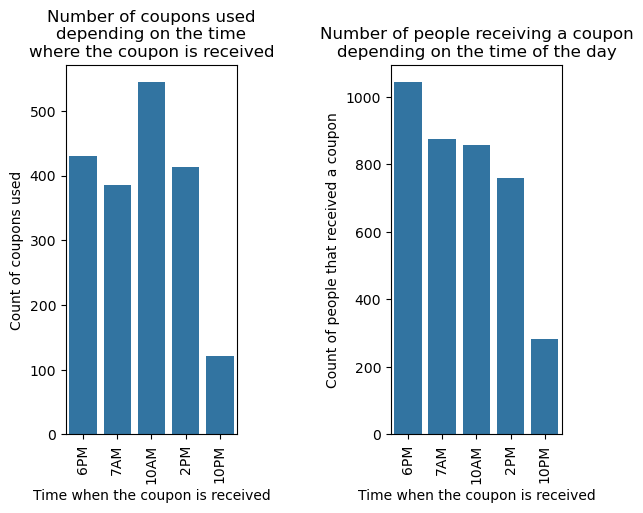

In [75]:
timeFig, timeAxs = plt.subplots(ncols=2)
timePlot0 = sns.countplot(data=coffeeCouponDf[coffeeCouponDf['Y'] == 1], x='time', ax=timeAxs[0], order=data['time'].value_counts().index)
timePlot1 = sns.countplot(data=coffeeCouponDf, x='time', ax=timeAxs[1], order=data['time'].value_counts().index)
timePlot0.tick_params(axis='x', labelrotation = 90)
timePlot0.set_title('Number of coupons used\ndepending on the time\nwhere the coupon is received')
timePlot0.set_xlabel('Time when the coupon is received')
timePlot0.set_ylabel('Count of coupons used')
timePlot1.set_title('Number of people receiving a coupon\ndepending on the time of the day')
timePlot1.set_xlabel('Time when the coupon is received')
timePlot1.set_ylabel('Count of people that received a coupon')
timePlot1.tick_params(axis='x', labelrotation = 90)
plt.subplots_adjust(wspace = 0.9)

In this plot we can see that the ratio seem great at 10am, we are probably around 60-65% of usage so it will be very interesting to dig into this result. On the other side, for example at 6pm the results seem to be around 40% which will not be interesting for us to improve the usage of the coupons because it's even under our average of usage for the Coffee House coupons.

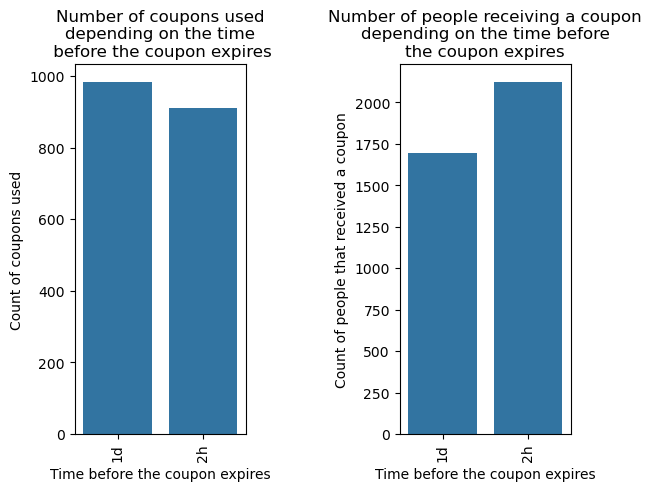

In [77]:
expirationFig, expirationAxs = plt.subplots(ncols=2)
expirationPlot0 = sns.countplot(data=coffeeCouponDf[coffeeCouponDf['Y'] == 1], x='expiration', ax=expirationAxs[0], order=data['expiration'].value_counts().index)
expirationPlot1 = sns.countplot(data=coffeeCouponDf, x='expiration', ax=expirationAxs[1], order=data['expiration'].value_counts().index)
expirationPlot0.tick_params(axis='x', labelrotation = 90)
expirationPlot0.tick_params(axis='x', labelrotation = 90)
expirationPlot0.set_title('Number of coupons used\ndepending on the time\n before the coupon expires')
expirationPlot0.set_xlabel('Time before the coupon expires')
expirationPlot0.set_ylabel('Count of coupons used')
expirationPlot1.set_title('Number of people receiving a coupon\ndepending on the time before\nthe coupon expires')
expirationPlot1.set_xlabel('Time before the coupon expires')
expirationPlot1.set_ylabel('Count of people that received a coupon')
expirationPlot1.tick_params(axis='x', labelrotation = 90)
plt.subplots_adjust(wspace = 0.9)

In this plot we can see that the ratio seem to be good for coupons that expire 1 day after, we can expect something around 55-60%. On the other side the coupons that expires 2 hours after seem to have a usage rate approximatively around 42-46% which is lower than our average so it seems that it's impacting negatively the usage of the coupons.

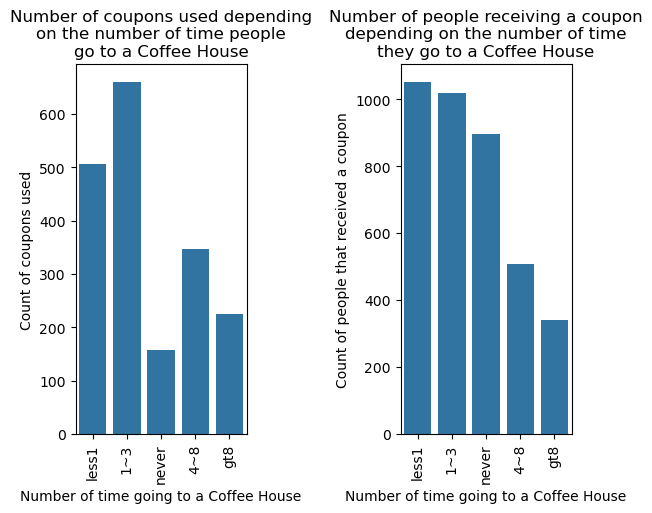

In [79]:
coffeeHouseFig, coffeeHouseAxs = plt.subplots(ncols=2)
coffeeHousePlot0 = sns.countplot(data=coffeeCouponDf[coffeeCouponDf['Y'] == 1], x='CoffeeHouse', ax=coffeeHouseAxs[0], order=data['CoffeeHouse'].value_counts().index)
coffeeHousePlot1 = sns.countplot(data=coffeeCouponDf, x='CoffeeHouse', ax=coffeeHouseAxs[1], order=data['CoffeeHouse'].value_counts().index)
coffeeHousePlot0.tick_params(axis='x', labelrotation = 90)
coffeeHousePlot0.set_title('Number of coupons used depending\non the number of time people\ngo to a Coffee House')
coffeeHousePlot0.set_xlabel('Number of time going to a Coffee House')
coffeeHousePlot0.set_ylabel('Count of coupons used')
coffeeHousePlot1.set_title('Number of people receiving a coupon\ndepending on the number of time\nthey go to a Coffee House')
coffeeHousePlot1.set_xlabel('Number of time going to a Coffee House')
coffeeHousePlot1.set_ylabel('Count of people that received a coupon')
coffeeHousePlot1.tick_params(axis='x', labelrotation = 90)
plt.subplots_adjust(wspace = 0.9)

In this plot we can see that people going to the Coffee House 1 to 3 times (which represent a big amount of the data) can be a very good target for coupon usage because they seem to have approximatively 62-68% ratio of usage of the coupons when on the other side people that never go to the Coffee House seem to be a very bad target, they look to have around 15-20% of usage.

Now that we have been able to find the values and columns that impacts the most the usage of the Coffee House coupons, let's see what improvements we can do combining them:

In [82]:
coffeeHouseDfT10AMExp1dCH13 = coffeeCouponDf.query(
    'time == "10AM" and expiration == "1d" and CoffeeHouse == "1~3"' 
)
print("Ratio for the people who are receiving their coupon at 10am, valid for 1 day and going 1 to 3 times to Coffee House: "
     + str(len(coffeeHouseDfT10AMExp1dCH13[coffeeHouseDfT10AMExp1dCH13['Y'] == 1]) / len(coffeeHouseDfT10AMExp1dCH13)))
print("Number of people impacted: " + str(len(coffeeHouseDfT10AMExp1dCH13)))

Ratio for the people who are receiving their coupon at 10am, valid for 1 day and going 1 to 3 times to Coffee House: 0.75
Number of people impacted: 72


This result shows us that combining all the most efficient values for the time of the day, the expiration time and the Coffee House routine gives us good results for the usage of the coupons but unfortunately it's targeting a very small amount of people so it's not interesting as a main target of customer, it can only be a part of a major target of customers.

In [84]:
coffeeHouseDfExp1dCH13 = coffeeCouponDf.query(
    'expiration == "1d" and CoffeeHouse == "1~3"'
)
print("Ratio for the people who are receiving a coupon valid for 1 day and going 1 to 3 times to Coffee House: "
     + str(len(coffeeHouseDfExp1dCH13[coffeeHouseDfExp1dCH13['Y'] == 1]) / len(coffeeHouseDfExp1dCH13)))
print("Number of people impacted: " + str(len(coffeeHouseDfExp1dCH13)))

Ratio for the people who are receiving a coupon valid for 1 day and going 1 to 3 times to Coffee House: 0.7382075471698113
Number of people impacted: 424


This result shows us that we have good results combining only two of the good values found before so it could be interesting to dig into the other double combination because it can give us good result and also keep the spectrum of data large enough, for example in this case we could have a start of potential market.

In [86]:
coffeeHouseDfT10AMExp1d = coffeeCouponDf.query(
    'time == "10AM" and expiration == "1d"'
)
print("Ratio for the people who are receiving their coupon at 10am and valid for 1 day: "
     + str(len(coffeeHouseDfT10AMExp1d[coffeeHouseDfT10AMExp1d['Y'] == 1]) / len(coffeeHouseDfT10AMExp1d)))
print("Number of people impacted: " + str(len(coffeeHouseDfT10AMExp1d)))

Ratio for the people who are receiving their coupon at 10am and valid for 1 day: 0.6461538461538462
Number of people impacted: 325


This result still show us good result compare to the average and on a decent sample.

In [88]:
coffeeHouseDfT10AMCH13 = coffeeCouponDf.query(
    'time == "10AM" and CoffeeHouse == "1~3"'
)
print("Ratio for the people who are receiving their coupon at 10am and going 1 to 3 times to Coffee House: "
     + str(len(coffeeHouseDfT10AMCH13[coffeeHouseDfT10AMCH13['Y'] == 1]) / len(coffeeHouseDfT10AMCH13)))
print("Number of people impacted: " + str(len(coffeeHouseDfT10AMCH13)))

Ratio for the people who are receiving their coupon at 10am and going 1 to 3 times to Coffee House: 0.8046511627906977
Number of people impacted: 215


This result is showing us great result, even better than the three values combined and it has a sample nearly three times the size of the one with the three values.

Now that we have tested all the different double combinations, we realize that they all have pretty good results and the samples are of decent sizes but it would be better to work on a bigger sample so let's try to combine them and see the results:

In [91]:
coffeeHouseDfCombinedData = coffeeCouponDf.query(
    '(expiration == "1d" and CoffeeHouse == "1~3")'
    + ' or (time == "10AM" and CoffeeHouse == "1~3")'
    + ' or (time == "10AM" and expiration == "1d")'
)
print("Ratio for the people who are respecting the condition above: "
     + str(len(coffeeHouseDfCombinedData[coffeeHouseDfCombinedData['Y'] == 1]) / len(coffeeHouseDfCombinedData)))
print("Number of people impacted: " + str(len(coffeeHouseDfCombinedData)))

Ratio for the people who are respecting the condition above: 0.7170731707317073
Number of people impacted: 820


With the combine result we realize that we get an acceptance rate of approximatively `72%` which is approximatively `22%` higher than the average for a sample that is close to a quarter of the data so we found a very good target to focus on for the distribution of coupons.

Finally I would like to focus a bit on the data decreasing the statistics to see if it could also be interesting to remove a part of the audience to have an easy improvement of the statistics so let's see the lower statistic we found:

In [94]:
coffeeHouseDfCHNever = coffeeCouponDf.query(
     'CoffeeHouse == "never"'
)
print("Ratio for the people who are never going to the Coffee House: "
     + str(len(coffeeHouseDfCHNever[coffeeHouseDfCHNever['Y'] == 1]) / len(coffeeHouseDfCHNever)))
print("Number of people impacted: " + str(len(coffeeHouseDfCHNever)))
coffeeHouseDfCHOther = coffeeCouponDf.query(
     'CoffeeHouse != "never"'
)
print("Ratio for the people who are going to the Coffee House: "
     + str(len(coffeeHouseDfCHOther[coffeeHouseDfCHOther['Y'] == 1]) / len(coffeeHouseDfCHOther)))
print("Number of people impacted: " + str(len(coffeeHouseDfCHOther)))

Ratio for the people who are never going to the Coffee House: 0.17522321428571427
Number of people impacted: 896
Ratio for the people who are going to the Coffee House: 0.5948630136986301
Number of people impacted: 2920


This result shows us that a very easy way to gain approximatively `10%` in the acceptance rate is just by not sending coupons to people never going to the Coffee House because their acceptence rate is very low with 17.5% but they still represent approximatively one quarter of the total amount of people.

Now for the next steps the company will have to chose if they prefer to focus on giving very large amount of coupons or not, in the case of choosing a large amount of coupon I would advise to not send it to people that never go to the Coffee House, on the other side if they prefer to send a restricted amount of coupons and focus on a more reactive market I would advise them to send coupons thinking about always respecting two of these three categories: have a coupon valid for one day, send it at 10am and send it to people going 1 to 3 times to the Coffee House.